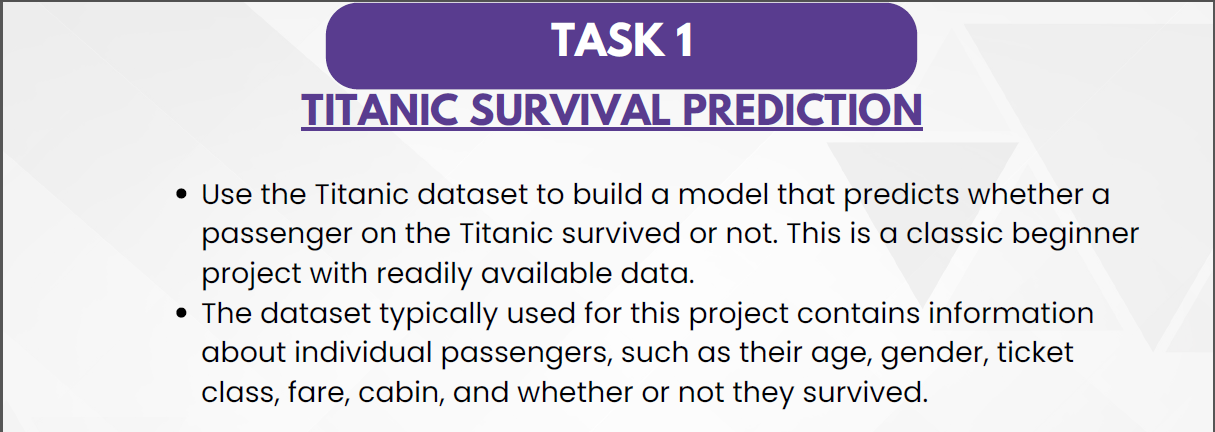

▶*TASK-1 : TITANIC SURVIVAL PREDICTION*

> Author: Hamesh Raj

> Batch: April

> Domain: Data Science

> Aim: To build a model that predicts whether a
passenger on the Titanic survived or not.

*Step 1: Import Libraries*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

*Step 2: Load the Dataset*

In [2]:
# Load the dataset
data = pd.read_csv("Titanic-Dataset.csv")

*Step 3: Data Preprocessing and Cleaning the data

In [3]:
#Shape of the dataset
print("Number of Rows in the Dataset: ", data.shape[0])
print("Number of Columns in the Dataset: ", data.shape[1])

Number of Rows in the Dataset:  891
Number of Columns in the Dataset:  12


In [4]:
# Display the first few rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Information of the Dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Check for missing Values:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Explore data statistics
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [12]:
data.groupby(["Sex"]).count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [13]:
data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

*Step 4: Data Visualization:*

<Axes: xlabel='Survived', ylabel='count'>

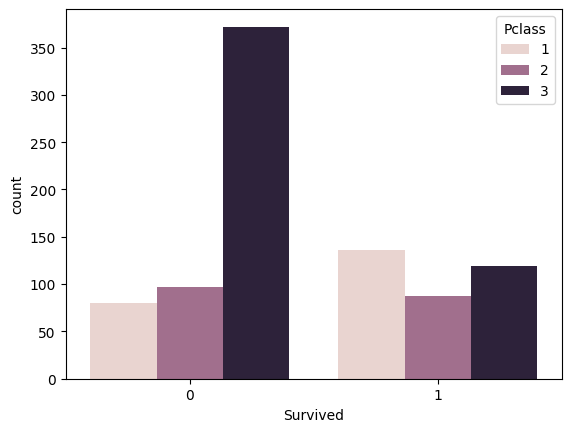

In [15]:
sns.countplot(x=data['Survived'], hue=data['Pclass'])

In [16]:
data.groupby(["Sex", "Survived"]).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

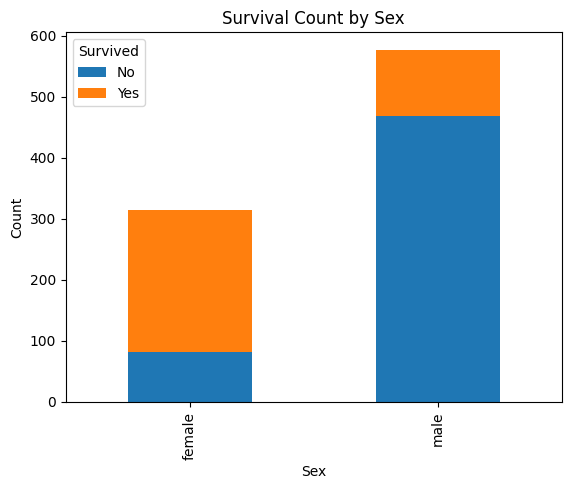

In [17]:
grouped_data = data.groupby(["Sex", "Survived"]).size().unstack()

# Plotting
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [18]:
# count the numbers of survived = 1 group by sex (male or female)
data.groupby(["Survived", "Sex"]).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   64     81     81      81    81   
         male            468     468   468  360    468    468     468   468   
1        female          233     233   233  197    233    233     233   233   
         male            109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Survived Sex                      
0        female      6        81  
         male       62       468  
1        female     91       231  
         male       45       109

In [19]:
data.groupby(["Survived", "Sex"])["Survived"].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [20]:
survival_counts = data["Survived"].value_counts()

print("Number of passengers who did not survive (0):", survival_counts[0])
print("Number of passengers who survived (1):", survival_counts[1])

Number of passengers who did not survive (0): 549
Number of passengers who survived (1): 342


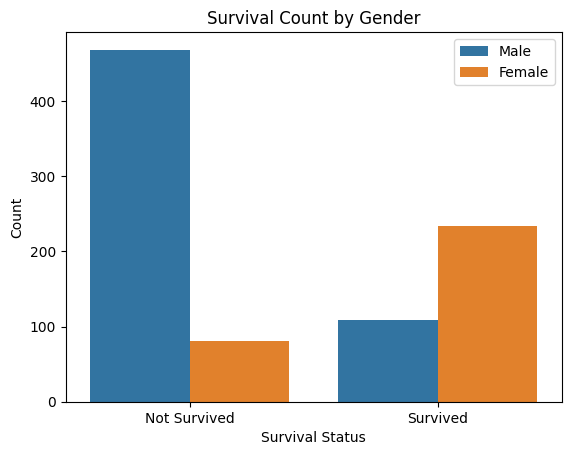

In [21]:
# Visualize data using seaborn
sns.countplot(x='Survived', data=data, hue="Sex")
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.title("Survival Count by Gender")
plt.legend(labels=["Male", "Female"])
plt.xticks(ticks=[0,1], labels=["Not Survived", "Survived"])
plt.show()


In [22]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
data['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [26]:
data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [27]:
data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [28]:

# data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data['Sex']= labelencoder.fit_transform(data['Sex'])


In [29]:
data['Sex'].unique()

array([1, 0])

<Axes: xlabel='Sex', ylabel='count'>

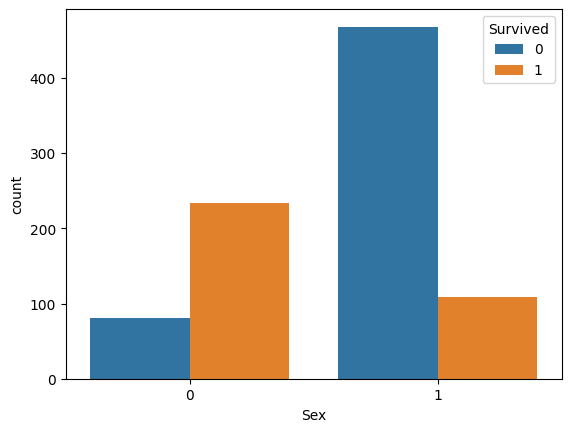

In [30]:
sns.countplot(x=data['Sex'], hue=data["Survived"])

In [31]:
# Handle missing values
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [32]:
# Check for null values in the entire dataset
null_values = data.isnull().sum()

if null_values.sum() == 0:
    print("No null values in the dataset after updating.")
else:
    print("There are still null values in the dataset after updating.")
    print("Null values in the dataset:")
    print(null_values)

There are still null values in the dataset after updating.
Null values in the dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [33]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [34]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [35]:
data["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [36]:
# Map the values in the "Embarked" column to integers
data["Embarked"] = data["Embarked"].map({'C': 1, 'Q': 2, 'S': 3})

In [37]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,3
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,3
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,3
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,1


In [38]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

In [39]:
# Dropping the columns which are not required
data.drop(['Name', 'Cabin', 'Ticket', 'Fare', 'Age', 'PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

In [40]:
# Move "Survived" column to the end of the DataFrame
survived_column = data.pop("Survived")
data["Survived"] = survived_column

In [41]:
data.head(10)

,Pclass,Sex,Embarked,Survived
0,3,1,3,0
1,1,0,1,1
2,3,0,3,1
3,1,0,3,1
4,3,1,3,0
5,3,1,2,0
6,1,1,3,0
7,3,1,3,0
8,3,0,3,1
9,2,0,1,1


*Step 5: Splitting the dataset into training and tesisng and Model Training*

In [42]:
X= data[['Pclass', 'Sex', 'Embarked']]
Y=data['Survived']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [44]:
#Applying Logistics Regression Model

from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

*Step 6: MODEL PREDICTION*

In [45]:
pred = print(log.predict(X_test))

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [46]:
print(Y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


### Here first parameter/argument is for pclass and second parameter/argument for female 0 or male 1 and third parameter/argument is Embarked C 1, Q 2 and S 3

In [47]:
data.head(10)

,Pclass,Sex,Embarked,Survived
0,3,1,3,0
1,1,0,1,1
2,3,0,3,1
3,1,0,3,1
4,3,1,3,0
5,3,1,2,0
6,1,1,3,0
7,3,1,3,0
8,3,0,3,1
9,2,0,1,1


In [48]:
import warnings
warnings.filterwarnings("ignore")

res= log.predict([[1, 0, 1]])

if(res==0):
  print("So Sorry! Not Survived")
else:
  print("Survived")

Survived


In [49]:
import warnings
warnings.filterwarnings("ignore")

res= log.predict([[3, 1, 3]])

if(res==0):
  print("So Sorry! Not Survived")
else:
  print("Survived")

So Sorry! Not Survived


In [50]:
import warnings
warnings.filterwarnings("ignore")

res= log.predict([[3, 0, 3]])

if(res==0):
  print("So Sorry! Not Survived")
else:
  print("Survived")

Survived
